In [49]:
from ml_mmpa import master_functions
import pandas as pd

from sklearn.manifold import TSNE

#chem

from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, MACCSkeys, Descriptors, Descriptors3D, Draw, rdMolDescriptors, Draw, PandasTools
from rdkit.DataManip.Metric.rdMetricMatrixCalc import GetTanimotoSimMat, GetTanimotoDistMat
from rdkit.Chem.rdmolops import FastFindRings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# carry out mmpa

# clean mmpa
    # first step is making sure the length of the core is longer (more heavy atoms) than either of the transform hands
    # Second step is finding unique transforms and calculating paired t-test
    # Third step is filtering p-val based on thresold and deciding weather to keep both positive and negative transforms
    
# prodcue functions for mmpa
# summarise results in a table

### MMPA

In [1]:
import sys

def abc(xyz):
    print(xyz)

if __name__ == "__main__":
    abc(sys.argv[1])

-f


In [4]:
# in the console run: 

# ! ./ml_mmpa/master_mmpa.sh data/efflux_mmpa.csv efflux;

# it will result in new items in the 'out' folder.


In [2]:
# Next we process that output:

output = pd.read_csv('out/index_efflux_final.csv')

In [3]:
output

,compound_structure_A,compound_structure_B,idsmiles_A,idsmiles_B,smirks,common_core,measurement_A,measurement_B,measurement_delta,LHS,RHS
0,CN\C(NCCSCc1ccc(CN(C)C)o1)=C/[N+]([O-])=O.Cl,CN\C(NCCSCc1csc(CN(C)C)n1)=C/[N+]([O-])=O,9393,20542,[*:1]NCCSCc1ccc([*:2])o1>>[*:1]NCCSCc1csc([*:2...,[*:1]/C(=C/[N+](=O)[O-])NC.[*:2]CN(C)C,16.52,6.05,-10.47,[*:1]NCCSCc1ccc([*:2])o1,[*:1]NCCSCc1csc([*:2])n1
1,C(=C/c(cc1)ccc1F)(/NC(c2ccccc2)=O)\C(=O)OC(C)C,C(=C\c(cc1)ccc1F)(/C(OCC)=O)\NC(c2ccccc2)=O,17912,44948,[*:1]C(=O)OC(C)C>>[*:1]C(=O)OCC,[*:1]/C(=C/c1ccc(F)cc1)NC(=O)c1ccccc1,6.67,2.79,-3.88,[*:1]C(=O)OC(C)C,[*:1]C(=O)OCC
2,C(=C/c(cc1)ccc1F)(/NC(C)=O)\C(=O)NC(C(C)C)C(O)=O,C(=C/c(cc1)ccc1F)(/NC(C)=O)\C(OCC)=O,47259,23556,[*:1]C(=O)NC(C(=O)O)C(C)C>>[*:1]C(=O)OCC,[*:1]/C(=C/c1ccc(F)cc1)NC(C)=O,-1.58,5.93,7.51,[*:1]C(=O)NC(C(=O)O)C(C)C,[*:1]C(=O)OCC
3,C(=C\c(cc1)cc(c1OC(C)=O)OC)(/C(NCC=C)=O)\NC(c2...,C(=C\c(cc1)cc(c1OC(C)=O)OC)(/C(=O)NCc2ccccc2)\...,10564,9068,[*:1]C(=O)NCC=C>>[*:1]C(=O)NCc1ccccc1,[*:1]/C(=C/c1ccc(OC(C)=O)c(OC)c1)NC(=O)c1ccccc1,6.09,18.06,11.97,[*:1]C(=O)NCC=C,[*:1]C(=O)NCc1ccccc1
4,C(=C\c(cc1)cc(c1OC(C)=O)OC)(/C(=O)NCc2ccccc2)\...,C(=C/c(cc1)cc(c1OC(C)=O)OC)(/NC(c2ccccc2)=O)\C...,9068,25097,[*:1]C(=O)NCc1ccccc1>>[*:1]C(=O)Nc1ccccc1C,[*:1]/C(=C/c1ccc(OC(C)=O)c(OC)c1)NC(=O)c1ccccc1,18.06,13.22,-4.84,[*:1]C(=O)NCc1ccccc1,[*:1]C(=O)Nc1ccccc1C
...,...,...,...,...,...,...,...,...,...,...,...
827187,N1(Cc2ccccc2)Sc3c(ccc(c3)[N+](=O)[O-])C1=O,N1(c2ccccc2)Sc3c(ccc(c3)[N+](=O)[O-])C1=O,26921,6632,[*:1]Cc1ccccc1>>[*:1]c1ccccc1,[*:1]n1sc2cc([N+](=O)[O-])ccc2c1=O,8.97,8.72,-0.25,[*:1]Cc1ccccc1,[*:1]c1ccccc1
827188,N1(c2ccccc2)Sc3c(ccc(c3)[N+](=O)[O-])C1=O,[N+](=O)([O-])c(cc1)cc(c12)SNC2=O,6632,46144,[*:1]c1ccccc1>>[*:1][H],[*:1]n1sc2cc([N+](=O)[O-])ccc2c1=O,8.72,2.22,-6.50,[*:1]c1ccccc1,[*:1][H]
827189,C1(=O)N(C)Sc2c1ccc(c2)[N+](=O)[O-],N1(Cc2ccccc2)Sc3c(ccc(c3)[N+](=O)[O-])C1=O,24593,26921,[*:1]C>>[*:1]Cc1ccccc1,[*:1]n1sc2cc([N+](=O)[O-])ccc2c1=O,25.55,8.97,-16.58,[*:1]C,[*:1]Cc1ccccc1
827190,C1(=O)N(C)Sc2c1ccc(c2)[N+](=O)[O-],[N+](=O)([O-])c(cc1)cc(c12)SNC2=O,24593,46144,[*:1]C>>[*:1][H],[*:1]n1sc2cc([N+](=O)[O-])ccc2c1=O,25.55,2.22,-23.33,[*:1]C,[*:1][H]


In [7]:
# first step is making sure the length of the core is longer (more heavy atoms) than either of the transform hands

output_len = master_functions.clean_mmpa_pairs_len(output) # filter pairs by len LHS & RHS vs CORE

KeyboardInterrupt: 

In [ ]:
'''
Second step is finding unique transforms and calculating paired t-test
It will produce dataframe with columns: smirks	dof	t-stat	p-val (t-test)	measurement_delta	std	sem
Sorted by descending dof

At this point both positive and negative transforms are present.
'''
output_len_stat = master_functions.stat_it_2(output_len)

In [ ]:
# you should save this file..pickle?

output_len_stat.to_pickle("out/output_len_stat.pkl")

output_len_stat.head(5)

In [5]:
#load pickle back in

output_len_stat = pd.read_pickle("out/output_len_stat.pkl") 


In [6]:
'''
Third step is filtering p-val based on thresold and deciding weather to keep both positive and negative transforms
Output is the significant transforms sorted by measurement delta

This is a great output to consider, but we can do one better by turning the transforms into functional groups
'''

mmpa_zero_pos = master_functions.zero_in(output_len_stat, 0.05, pos_only=True)

# Add split columns to the dataframe

mmpa_zero_pos = master_functions.split_transition(mmpa_zero_pos, 'smirks')


Number of unique transforms where p-val < 0.05 is 2836
Split between 2836 positive transforms and 0 negative transforms


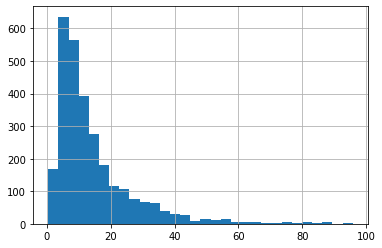

In [7]:
mmpa_zero_pos.measurement_delta.hist(bins=30)

In [8]:
mmpa_zero_pos.head(10)

,smirks,dof,t-stat,p-val (t-test),measurement_delta,std,sem,LHS,RHS
0,[*:1]CNC(=O)CO[*:2]>>[*:1]N1C(=O)C(O)=CC1([*:2])O,3,107.830725,0.000002,95.750000,1.775932,0.887966,[*:1]CNC(=O)CO[*:2],[*:1]N1C(=O)C(O)=CC1([*:2])O
1,[*:1]/C=N/C([*:2])/N=C/[*:3]>>[*:1][P+]([*:2])...,2,19.757254,0.002552,88.363333,7.746511,4.472450,[*:1]/C=N/C([*:2])/N=C/[*:3],[*:1][P+]([*:2])([*:3])Cc1cccc(N)c1
2,[*:1]/C=N/C([*:2])/N=C/[*:3]>>[*:1]Nc1cn([*:2]...,2,19.569437,0.002601,87.523333,7.746511,4.472450,[*:1]/C=N/C([*:2])/N=C/[*:3],[*:1]Nc1cn([*:2])c(CCC)[n+]1[*:3]
3,[*:1]/C=N/C([*:2])/N=C/[*:3]>>[*:1][P+]([*:2])...,2,19.372677,0.002654,86.643333,7.746511,4.472450,[*:1]/C=N/C([*:2])/N=C/[*:3],[*:1][P+]([*:2])([*:3])Cc1ccc(N)cc1
4,[*:1]C1CC1>>[*:1]c1ccc2ccccc2n1,3,4.139237,0.025600,86.630000,41.857952,20.928976,[*:1]C1CC1,[*:1]c1ccc2ccccc2n1
5,[*:1]C(=O)c1ccc(N)cc1>>[*:1]c1cccc(N)c1,2,23.769812,0.001765,84.753333,6.175778,3.565587,[*:1]C(=O)c1ccc(N)cc1,[*:1]c1cccc(N)c1
6,[*:1]CC(=O)c1ccc(N)cc1>>[*:1]Cc1cccc(N)c1,2,23.769812,0.001765,84.753333,6.175778,3.565587,[*:1]CC(=O)c1ccc(N)cc1,[*:1]Cc1cccc(N)c1
7,[*:1]C(=O)c1ccc(N)cc1>>[*:1]c1ccc(N)cc1,2,23.287423,0.001839,83.033333,6.175778,3.565587,[*:1]C(=O)c1ccc(N)cc1,[*:1]c1ccc(N)cc1
8,[*:1]CC(=O)c1ccc(N)cc1>>[*:1]Cc1ccc(N)cc1,2,23.287423,0.001839,83.033333,6.175778,3.565587,[*:1]CC(=O)c1ccc(N)cc1,[*:1]Cc1ccc(N)cc1
9,[*:1]CNC(=O)CC(CO)NC[*:2]>>[*:1]N=Nc1nc(C)c(N=...,3,110.123051,0.000002,82.365000,1.495872,0.747936,[*:1]CNC(=O)CC(CO)NC[*:2],[*:1]N=Nc1nc(C)c(N=N[*:2])[nH]1


In [9]:
# features_all_neg

In [10]:
mmpa_zero_pos

,smirks,dof,t-stat,p-val (t-test),measurement_delta,std,sem,LHS,RHS
0,[*:1]CNC(=O)CO[*:2]>>[*:1]N1C(=O)C(O)=CC1([*:2])O,3,107.830725,0.000002,95.750000,1.775932,0.887966,[*:1]CNC(=O)CO[*:2],[*:1]N1C(=O)C(O)=CC1([*:2])O
1,[*:1]/C=N/C([*:2])/N=C/[*:3]>>[*:1][P+]([*:2])...,2,19.757254,0.002552,88.363333,7.746511,4.472450,[*:1]/C=N/C([*:2])/N=C/[*:3],[*:1][P+]([*:2])([*:3])Cc1cccc(N)c1
2,[*:1]/C=N/C([*:2])/N=C/[*:3]>>[*:1]Nc1cn([*:2]...,2,19.569437,0.002601,87.523333,7.746511,4.472450,[*:1]/C=N/C([*:2])/N=C/[*:3],[*:1]Nc1cn([*:2])c(CCC)[n+]1[*:3]
3,[*:1]/C=N/C([*:2])/N=C/[*:3]>>[*:1][P+]([*:2])...,2,19.372677,0.002654,86.643333,7.746511,4.472450,[*:1]/C=N/C([*:2])/N=C/[*:3],[*:1][P+]([*:2])([*:3])Cc1ccc(N)cc1
4,[*:1]C1CC1>>[*:1]c1ccc2ccccc2n1,3,4.139237,0.025600,86.630000,41.857952,20.928976,[*:1]C1CC1,[*:1]c1ccc2ccccc2n1
...,...,...,...,...,...,...,...,...,...
2831,[*:1]/C=C(\CC(=O)O)C(=O)OC>>[*:1]C1CNC(=O)C1C(...,3,4.450692,0.021106,1.080000,0.485318,0.242659,[*:1]/C=C(\CC(=O)O)C(=O)OC,[*:1]C1CNC(=O)C1C(=O)O
2832,[*:1]C>>[*:1]C1CNC(=O)C1C(=O)O,3,4.244642,0.023951,1.030000,0.485318,0.242659,[*:1]C,[*:1]C1CNC(=O)C1C(=O)O
2833,[*:1]C>>[*:1][H],2819,3.781961,0.000159,1.017333,14.284687,0.268996,[*:1]C,[*:1][H]
2834,[*:1]Sc1nnc2n(N)cnn12>>[*:1][H],2,inf,0.000000,0.790000,0.000000,0.000000,[*:1]Sc1nnc2n(N)cnn12,[*:1][H]


In [11]:
features_2_all_neg, l_feats_2_neg, r_feats_2_neg = master_functions.calculate_fractions_mk5(mmpa_zero_pos)


  0%|          | 0/2836 [00:00<?, ?it/s]

/cluster/uz_lab/dgurvic/git_projects/efflux_mmpa
Generating molecular objects from pre-defined substructures
Calcualting LHS+RHS matches


 64%|██████▎   | 1807/2836 [00:30<00:14, 69.71it/s]RDKit ERROR: [16:15:41] Can't kekulize mol.  Unkekulized atoms: 6 7 8 10
RDKit ERROR: 
 64%|██████▍   | 1820/2836 [00:30<00:20, 48.65it/s]

Error:  1811 ['[*:1]N1C(=O)C(O)=CC1([*:2])O' '[*:1][P+]([*:2])([*:3])Cc1cccc(N)c1'
 '[*:1]Nc1cn([*:2])c(CCC)[n+]1[*:3]' ... '[*:1][H]' '[*:1][H]' '[*:1][H]']


100%|██████████| 2836/2836 [00:46<00:00, 61.23it/s]


In [8]:
features_2_all_neg

,0,26,28,42,43,> 2 ester groups,1 - Alkane group,"1,2-Dicarbonyl not in ring",10 - Aldehyde,11 - Acetate group,...,Ugly P compounds,Unacceptable atoms,Unbranched chain,Undesirable_elements_salts,Vinyl michael acceptor1,Vinyl michael acceptor2,Vinyl_halide,Vinyl_sulphone,smirks,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,[*:1]CNC(=O)CO[*:2]>>[*:1]N1C(=O)C(O)=CC1([*:2])O,95.75
1,0,0,0,0,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,[*:1]/C=N/C([*:2])/N=C/[*:3]>>[*:1][P+]([*:2])...,88.3633
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,[*:1]/C=N/C([*:2])/N=C/[*:3]>>[*:1]Nc1cn([*:2]...,87.5233
3,0,0,0,0,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,[*:1]/C=N/C([*:2])/N=C/[*:3]>>[*:1][P+]([*:2])...,86.6433
4,0,0,0,0,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,[*:1]C1CC1>>[*:1]c1ccc2ccccc2n1,86.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,[*:1]/C=C(\CC(=O)O)C(=O)OC>>[*:1]C1CNC(=O)C1C(...,1.08
2832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,[*:1]C>>[*:1]C1CNC(=O)C1C(=O)O,1.03
2833,0,0,0,0,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,[*:1]C>>[*:1][H],1.01733
2834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,[*:1]Sc1nnc2n(N)cnn12>>[*:1][H],0.79


In [ ]:
mmpa_zero_pos.iloc[1811]

In [10]:
# to_drop = ['arene', 'heteroarene', 'alkyne', 'benzene ring', 'amine', 'azaarene', 'alkene', 'aryl halide', 'alkyl halide', 'leaving group', 'alkenyl halide']

# features_all_dropped_neg = features_2_all_neg.drop(to_drop, axis = 1)

# l_feats_dropped_neg =  l_feats_neg.drop(to_drop, axis = 1)
# r_feats_dropped_neg =  r_feats_neg.drop(to_drop, axis = 1)

# fractions_to_drop=['fr_ketone_Topliss', 'fr_Al_OH_noTert', 'fr_Ar_N', 'fr_methoxy', 'fr_C_O', 'fr_phenol_noOrthoHbond' ]
# fractions above are kept as significant but not looked at on the exchange

fr_sig_descriptors_neg = master_functions.find_sig_feats_mk2(l_feats_2_neg, r_feats_2_neg, 0.01)

Found significant fractions:  100


In [11]:
fr_sig_descriptors_neg

,0,13 - Ether,15 - Secondary amine group,16 - Tertiary amine,17 - Aromatic amine,18 - Pyridine,19 - CCN,2 - Olefin group,20 - COOH,21 - CCl,...,sp2 hybridized carbon atoms (5),sp3 hybridized carbon atoms (10),sp3 hybridized carbon atoms (11),sp3 hybridized carbon atoms (4),sp3 hybridized carbon atoms (5),sp3 hybridized carbon atoms (6),Sulphur atom (3),Sulphur atom (6),Triple bond,Triple_bond
0,0.000003,0.001570,0.008988,1.169302e-12,7.678755e-20,0.000002,0.000081,1.490255e-83,0.002109,2.712729e-12,...,6.092255e-16,1.368596e-07,2.305932e-16,6.142204e-07,0.000517,7.352187e-09,2.289813e-13,0.000001,1.961528e-14,0.008128
1,-4.707885,-3.164476,2.614318,-7.141382e+00,9.185696e+00,4.744928,-3.948473,-2.002651e+01,-3.077268,7.022730e+00,...,-8.135055e+00,5.282811e+00,-8.254686e+00,4.998089e+00,-3.475653,5.800283e+00,7.366215e+00,4.858604,-7.693508e+00,-2.648555


In [15]:

fractions_to_drop=[]

res_neg_neg= master_functions.results_arr(features_2_all_neg, fr_sig_descriptors_neg, r_feats_2_neg, l_feats_2_neg, fractions_to_drop)

In [24]:
res_neg_neg

,Main fraction,Correlation,$\overline{\Delta P}$,sem,std,dof,Opposite fraction 1,% of opposite 1,Opposite fraction 2,% of opposite 2,Opposite fraction 3,% of opposite 3
28,Acyclic N-C-N,Negative,-41.97,6.06,26.43,19,"(3 - Aromatic carbon, sp3 hybridized carbon at...",36.84,Positively charged atoms,26.32,5 - Alcohol,26.32
46,Catechol,Positive,31.76,4.20,15.15,13,sp3 hybridized carbon atoms (6),-38.46,"(sp3 hybridized carbon atoms (3), sp3 hybridiz...",-38.46,2 - Olefin group,-23.08
63,Hydrazine,Positive,29.87,2.73,19.68,52,sp2 hybridized carbon atoms (11),-48.08,"(sp2 hybridized carbon atoms (2), 2 - Olefin g...",-36.54,"E3 - e.g., carbonates",-28.85
55,Filter20_hydrazine,Positive,28.51,2.69,19.97,55,sp2 hybridized carbon atoms (11),-47.27,"(sp2 hybridized carbon atoms (2), 2 - Olefin g...",-36.36,NUC,-29.09
86,Positively charged atoms,Positive,28.47,1.75,19.71,127,sp3 hybridized carbon atoms (11),-46.46,sp3 hybridized carbon atoms (6),-37.80,13 - Ether,-34.65
...,...,...,...,...,...,...,...,...,...,...,...,...
61,Filter89_hydroxylamine,Negative,-9.14,0.81,5.69,50,sp3 hybridized carbon atoms (6),56.00,sp3 hybridized carbon atoms (10),30.00,Carbamate include di-substitued N,28.00
29,Acyclic no not nitro,Negative,-9.14,0.81,5.69,50,sp3 hybridized carbon atoms (6),56.00,sp3 hybridized carbon atoms (10),30.00,Carbamate include di-substitued N,28.00
83,Oxime (1),Negative,-8.54,0.74,3.21,19,sp3 hybridized carbon atoms (6),63.16,sp3 hybridized carbon atoms (10),42.11,1 - Alkane group,31.58
54,Filter14_thio_oxopyrylium_salt,Negative,-7.19,0.78,2.82,13,Poly_sub_atomatic,84.62,"(sp3 hybridized carbon atoms (6), 13 - Ether)",53.85,ACID,23.08


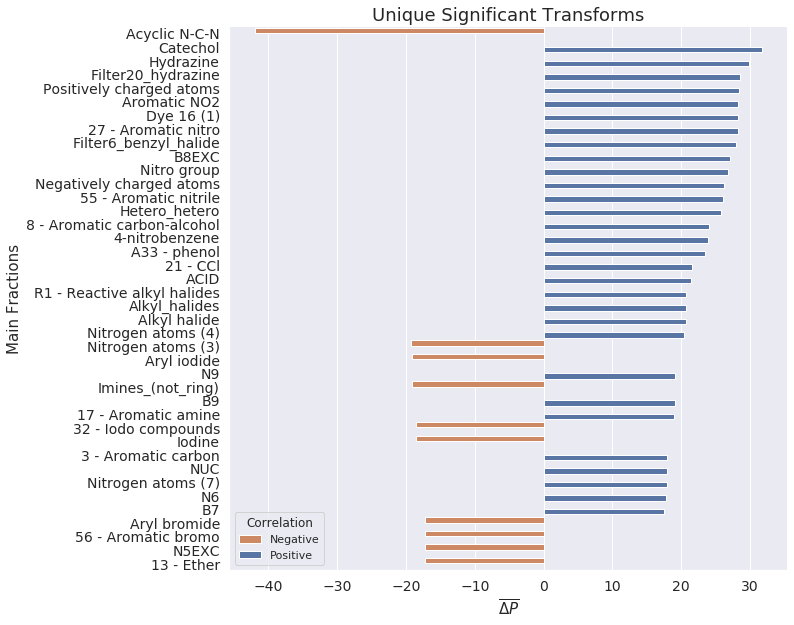

In [25]:
master_functions.plot_feats(res_neg_neg[:40])

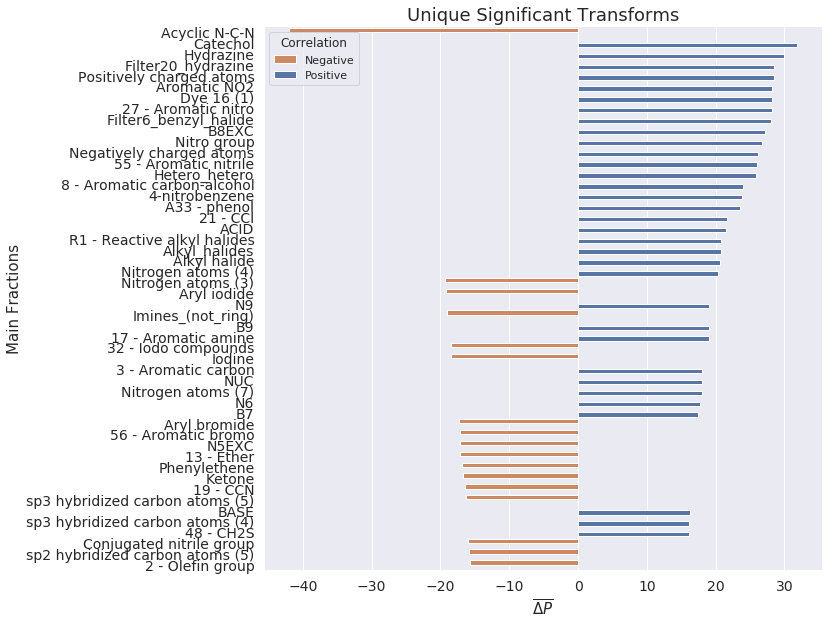

In [14]:
master_functions.plot_feats(res_neg_neg[:50])

## Old features

In [12]:
features_all_neg, l_feats_neg, r_feats_neg = master_functions.calculate_fractions_mk4(mmpa_zero_pos)


  1%|          | 22/2836 [00:00<00:13, 216.13it/s]

Generating molecular objects from pre-defined substructures
Calcualting LHS+RHS matches


100%|██████████| 2836/2836 [00:12<00:00, 225.67it/s]


In [13]:
to_drop = ['arene', 'heteroarene', 'alkyne', 'benzene ring', 'amine', 'azaarene', 'alkene', 'aryl halide', 'alkyl halide', 'leaving group', 'alkenyl halide']

features_all_dropped_neg = features_all_neg.drop(to_drop, axis = 1)

l_feats_dropped_neg =  l_feats_neg.drop(to_drop, axis = 1)
r_feats_dropped_neg =  r_feats_neg.drop(to_drop, axis = 1)

fr_sig_descriptors_neg_mk4 = master_functions.find_sig_feats_mk2(l_feats_neg, r_feats_neg, 0.01)

Found significant fractions:  43


In [16]:
res_neg_neg_mk4= master_functions.results_arr(features_all_neg, fr_sig_descriptors_neg_mk4, r_feats_neg, l_feats_neg, fractions_to_drop)

aniline has positive correlation 
arene has positive correlation 
azaarene has positive correlation 
benzene ring has negative correlation 
heteroarene has positive correlation 
phenol has positive correlation 
alkene has negative correlation 
alkyne has negative correlation 
percentage_loss 100
amidine has negative correlation 
second gain
['arene', ('benzene ring', 'amine'), 'heteroarene']
[56.41, 33.33, 23.08]
percentage_loss 100
aminal has negative correlation 
second gain
['carbonyl', ('carboxamide', 'alkanol'), 'secondary carboxamide']
[45.45, 33.33, 21.21]
amine has positive correlation 
primary amine has positive correlation 
percentage gain under -100
secondary amine has positive correlation 
tertiary amine has negative correlation 
enamine has negative correlation 
percentage_loss 100
hydrazine has positive correlation 
percentage gain under -100
hydrazone has negative correlation 
percentage_loss 100
iminyl has negative correlation 
nitrile has negative correlation 
second g

In [ ]:
res_neg_neg_mk4

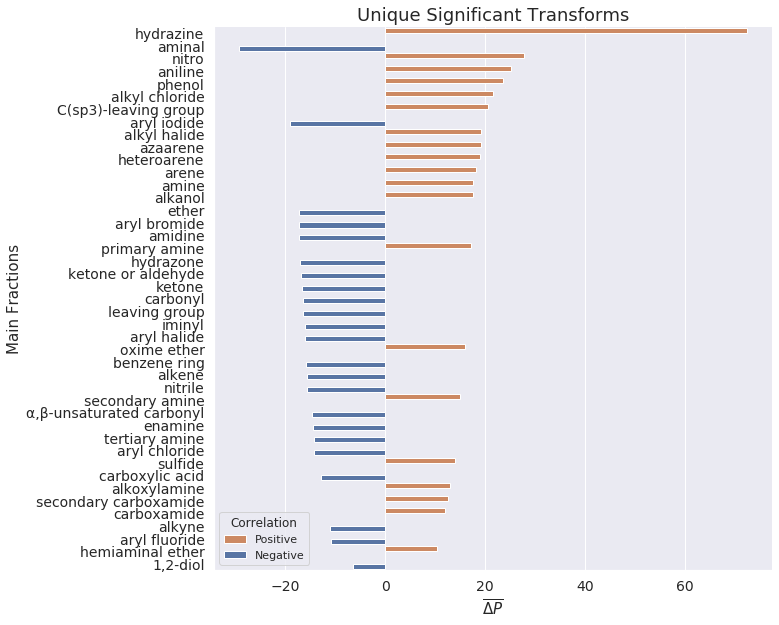

In [17]:
master_functions.plot_feats(res_neg_neg_mk4)

# TSNE

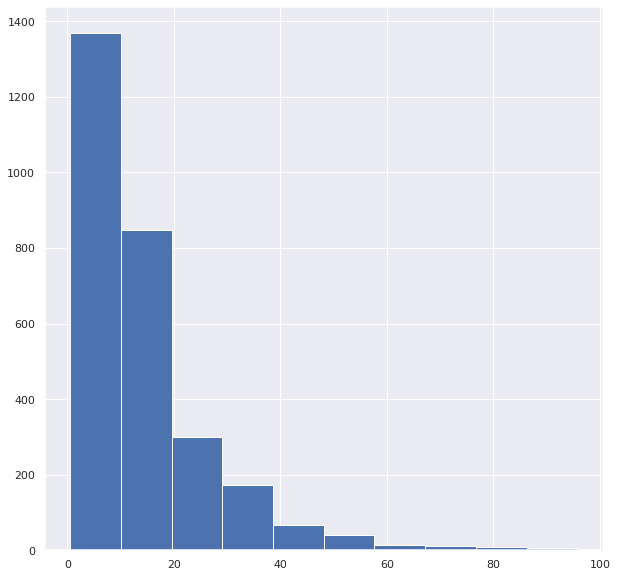

In [99]:
mmpa_zero_pos.measurement_delta.hist()

In [36]:
def get_it(smart):
    mol = Chem.MolFromSmarts(smart)
    mol.UpdatePropertyCache()
    FastFindRings(mol)
    return MACCSkeys.GenMACCSKeys(mol)

In [132]:
LHS=pd.DataFrame()
RHS=pd.DataFrame()
trans_fin_tsne=pd.DataFrame()

In [105]:
mmpa_zero_pos[mmpa_zero_pos['measurement_delta']>20]

,smirks,dof,t-stat,p-val (t-test),measurement_delta,std,sem,LHS,RHS,LHS_fps,RHS_fps
0,[*:1]CNC(=O)CO[*:2]>>[*:1]N1C(=O)C(O)=CC1([*:2])O,3,107.830725,1.758364e-06,95.750000,1.775932,0.887966,[*:1]CNC(=O)CO[*:2],[*:1]N1C(=O)C(O)=CC1([*:2])O,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,[*:1]/C=N/C([*:2])/N=C/[*:3]>>[*:1][P+]([*:2])...,2,19.757254,2.552007e-03,88.363333,7.746511,4.472450,[*:1]/C=N/C([*:2])/N=C/[*:3],[*:1][P+]([*:2])([*:3])Cc1cccc(N)c1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,[*:1]/C=N/C([*:2])/N=C/[*:3]>>[*:1]Nc1cn([*:2]...,2,19.569437,2.601036e-03,87.523333,7.746511,4.472450,[*:1]/C=N/C([*:2])/N=C/[*:3],[*:1]Nc1cn([*:2])c(CCC)[n+]1[*:3],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,[*:1]/C=N/C([*:2])/N=C/[*:3]>>[*:1][P+]([*:2])...,2,19.372677,2.653928e-03,86.643333,7.746511,4.472450,[*:1]/C=N/C([*:2])/N=C/[*:3],[*:1][P+]([*:2])([*:3])Cc1ccc(N)cc1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,[*:1]C1CC1>>[*:1]c1ccc2ccccc2n1,3,4.139237,2.559953e-02,86.630000,41.857952,20.928976,[*:1]C1CC1,[*:1]c1ccc2ccccc2n1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...
591,[*:1]c1cc(C)c([*:2])c(C)c1>>[*:2]c1ccccc1O[C@H...,2,11.737652,7.180263e-03,20.133333,2.970948,1.715278,[*:1]c1cc(C)c([*:2])c(C)c1,[*:2]c1ccccc1O[C@H]([*:1])C,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
592,[*:1]CC1CC([*:2])=NO1>>[*:1]c1cnnn1[*:2],15,14.437494,3.325748e-10,20.110000,5.571604,1.392901,[*:1]CC1CC([*:2])=NO1,[*:1]c1cnnn1[*:2],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
593,[*:1]C(=O)C([*:2])C#N>>[*:1]CNCC1=NOC(C[*:2])C1,7,7.858290,1.021497e-04,20.105000,7.236374,2.558445,[*:1]C(=O)C([*:2])C#N,[*:1]CNCC1=NOC(C[*:2])C1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
594,[*:1]c1ccc(OC)c(Br)c1>>[*:1]c1cccc([N+](=O)[O-...,11,3.151948,9.210148e-03,20.060833,22.047560,6.364582,[*:1]c1ccc(OC)c(Br)c1,[*:1]c1cccc([N+](=O)[O-])c1O,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [134]:
# LHS['fps'] = mmpa_zero_pos[mmpa_zero_pos['measurement_delta']>20]['LHS'].apply(get_it)
# RHS['fps'] = mmpa_zero_pos[mmpa_zero_pos['measurement_delta']>20]['RHS'].apply(get_it)

LHS['fps'] = mmpa_zero_pos['LHS'].apply(get_it)
RHS['fps'] = mmpa_zero_pos['RHS'].apply(get_it)


LHS['lab']='LHS'
RHS['lab']='RHS'

In [103]:
trans_fin_tsne=RHS.append(LHS)

In [107]:
trans_fin_tsne

,fps,lab
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",RHS
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",RHS
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",RHS
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",RHS
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",RHS
...,...,...
591,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",LHS
592,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",LHS
593,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",LHS
594,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",LHS


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1192 samples in 0.095s...
[t-SNE] Computed neighbors for 1192 samples in 2.389s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1192
[t-SNE] Computed conditional probabilities for sample 1192 / 1192
[t-SNE] Mean sigma: 1.786195
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.320271
[t-SNE] KL divergence after 1000 iterations: 0.087463


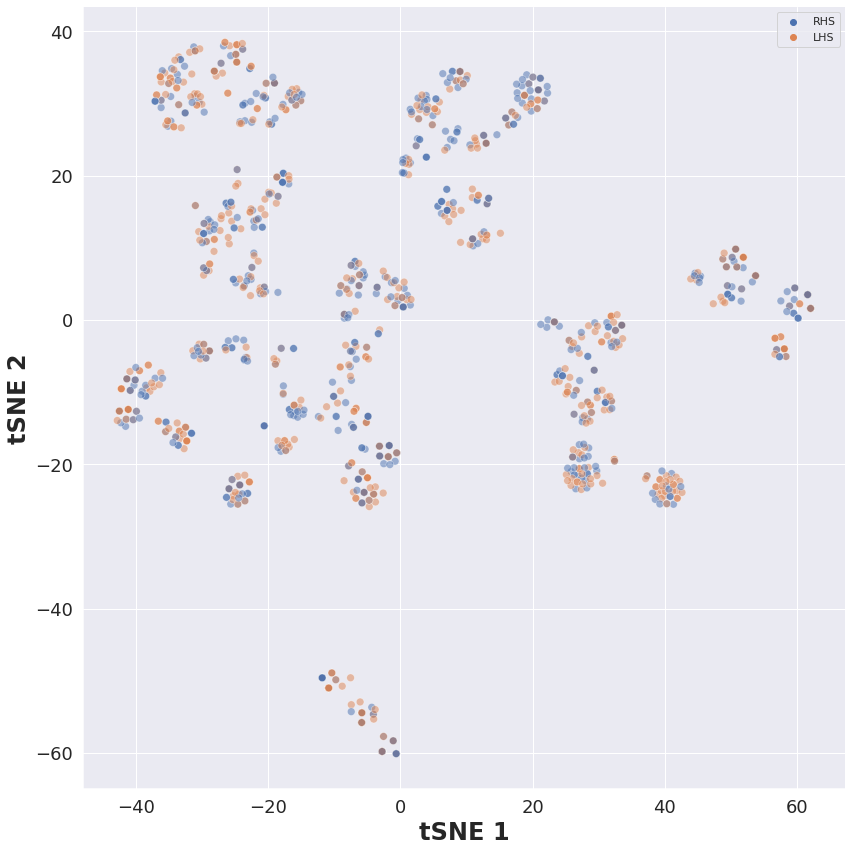

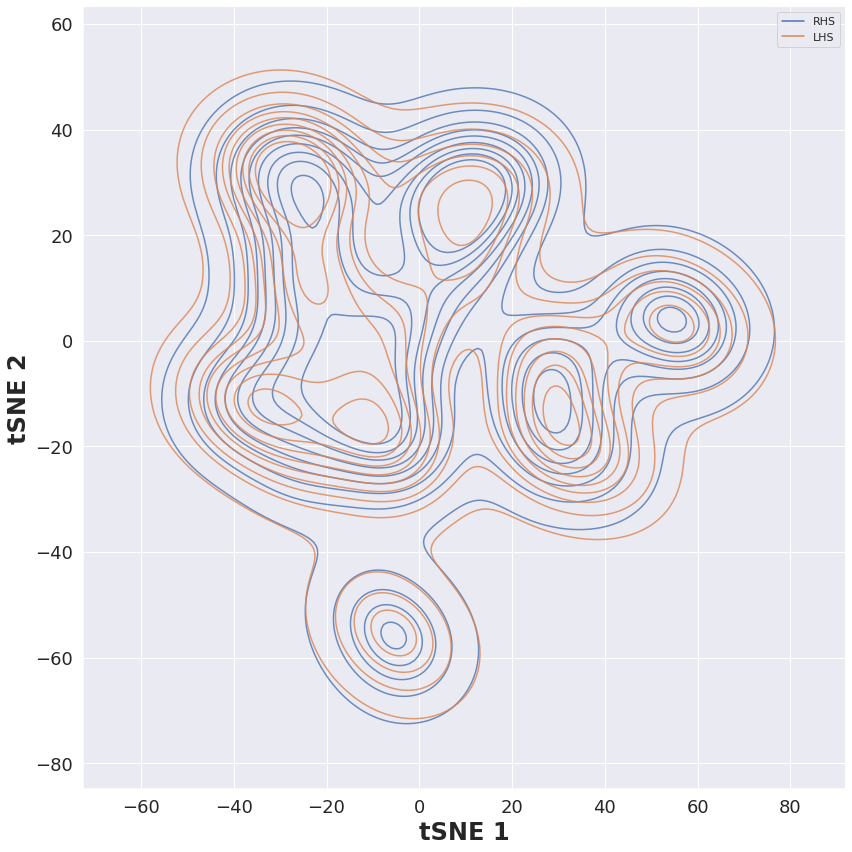

In [110]:
sample = trans_fin_tsne.sample(1192)

tsne(sample['fps'], len(sample), 50, sample['lab'].values)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2836 samples in 0.503s...
[t-SNE] Computed neighbors for 2836 samples in 21.985s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2836
[t-SNE] Computed conditional probabilities for sample 2000 / 2836
[t-SNE] Computed conditional probabilities for sample 2836 / 2836
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.979366
[t-SNE] KL divergence after 1000 iterations: 0.125014


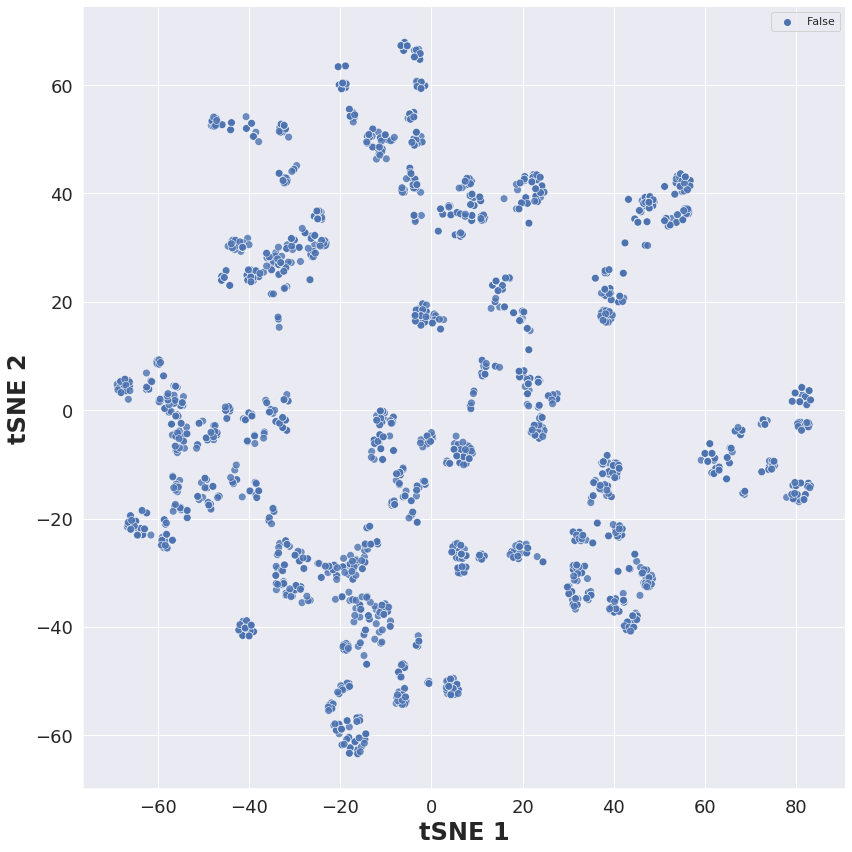

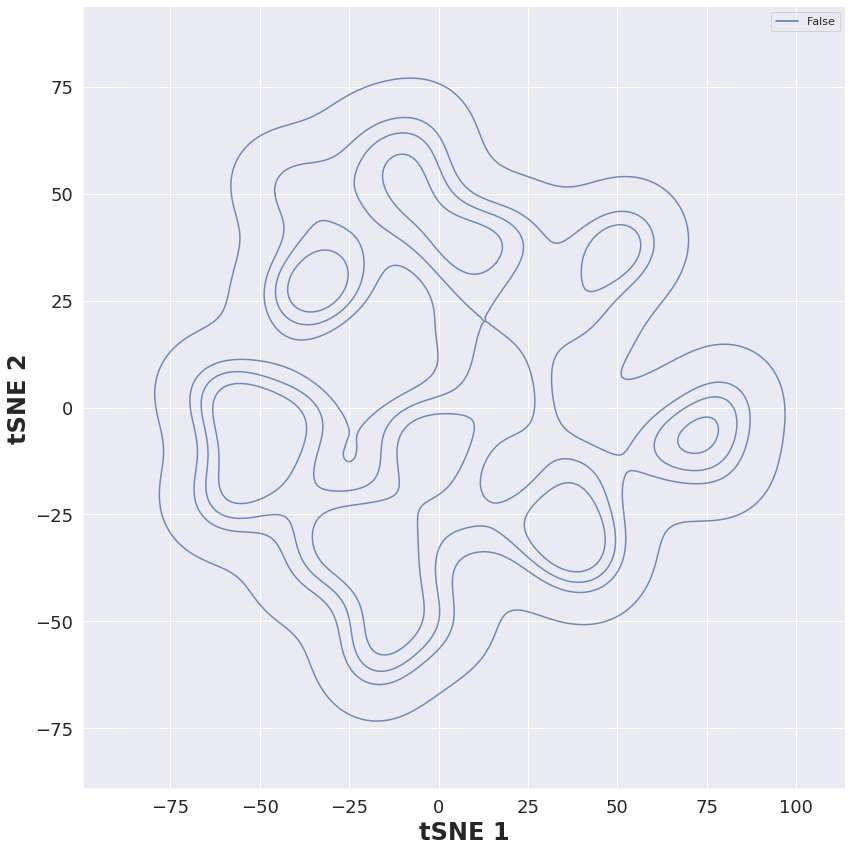

In [60]:
tsne(mmpa_zero_pos['LHS_fps'], len(mmpa_zero_pos), 50, label=False)

In [109]:
def tsne(df, sample_size, perp, label ):
    
    sample = df.sample(sample_size).values

    tanimoto_sim_mat_lower_triangle=GetTanimotoSimMat(sample) # similartity matrix 
    n_mol = len(sample)
    similarity_matrix = np.ones([n_mol,n_mol])
    i_lower= np.tril_indices(n=n_mol,m=n_mol,k=-1)
    i_upper= np.triu_indices(n=n_mol,m=n_mol,k=1)
    similarity_matrix[i_lower] = tanimoto_sim_mat_lower_triangle
    similarity_matrix[i_upper] = similarity_matrix.T[i_upper] 
    distance_matrix = np.subtract(1,similarity_matrix) 

    TSNE_sim = TSNE(verbose=1, n_components=2, init='pca', method='barnes_hut', perplexity=perp).fit_transform(distance_matrix) 
    
    tsne_result = pd.DataFrame(data = TSNE_sim , columns=["TC1","TC2"]) 
    
    plt.rcParams['axes.linewidth'] = 1.5
    fig, ax = plt.subplots(figsize=(12,12))

    ax=sns.scatterplot(x='TC1',y='TC2',data=tsne_result, s=60 ,alpha=0.5, hue=label) #, palette=["C0", "C1"])
    
    plt.xlabel ('tSNE 1',fontsize=24,fontweight='bold')

    plt.ylabel ('tSNE 2',fontsize=24,fontweight='bold')

    plt.tick_params ('both',width=2,labelsize=18)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    handles, labels = ax.get_legend_handles_labels()

    #ax.legend(handles=handles[1:], labels=labels[1:])

    #plt.legend(loc='lower right',frameon=False,prop={'size': 22},ncol=1)

    plt.tight_layout()
    plt.show()
    
    plt.rcParams['axes.linewidth'] = 1.5
    
    fig, ax = plt.subplots(figsize=(12,12))

    ax=sns.kdeplot(x='TC1',y='TC2',data=tsne_result,alpha=0.8, levels=10, hue=label) # , palette=["C0", "C1"])

    plt.xlabel ('tSNE 1',fontsize=24,fontweight='bold')

    plt.ylabel ('tSNE 2',fontsize=24,fontweight='bold')

    plt.tick_params ('both',width=2,labelsize=18)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    handles, labels = ax.get_legend_handles_labels()

    #ax.legend(handles=handles[1:], labels=labels[1:])

    #plt.legend(loc='lower right',frameon=False,prop={'size': 22},ncol=1)

    plt.tight_layout()
    plt.show()


In [119]:
def tsne_no_plot(df, perp):
    sample=df
    tanimoto_sim_mat_lower_triangle=GetTanimotoSimMat(sample) # similartity matrix 
    n_mol = len(sample)
    similarity_matrix = np.ones([n_mol,n_mol])
    i_lower= np.tril_indices(n=n_mol,m=n_mol,k=-1)
    i_upper= np.triu_indices(n=n_mol,m=n_mol,k=1)
    similarity_matrix[i_lower] = tanimoto_sim_mat_lower_triangle
    similarity_matrix[i_upper] = similarity_matrix.T[i_upper] 
    distance_matrix = np.subtract(1,similarity_matrix) 

    TSNE_sim = TSNE(verbose=1, n_components=2, init='pca', method='barnes_hut', perplexity=perp).fit_transform(distance_matrix) 

    tsne_result = pd.DataFrame(data = TSNE_sim , columns=["TC1","TC2"]) 
    return tsne_result

In [135]:
tsne_RHS = tsne_no_plot(RHS['fps'], perp= 50 )

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2836 samples in 0.506s...
[t-SNE] Computed neighbors for 2836 samples in 20.036s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2836
[t-SNE] Computed conditional probabilities for sample 2000 / 2836
[t-SNE] Computed conditional probabilities for sample 2836 / 2836
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.517399
[t-SNE] KL divergence after 1000 iterations: 0.102285


In [136]:
len(tsne_RHS)

2836

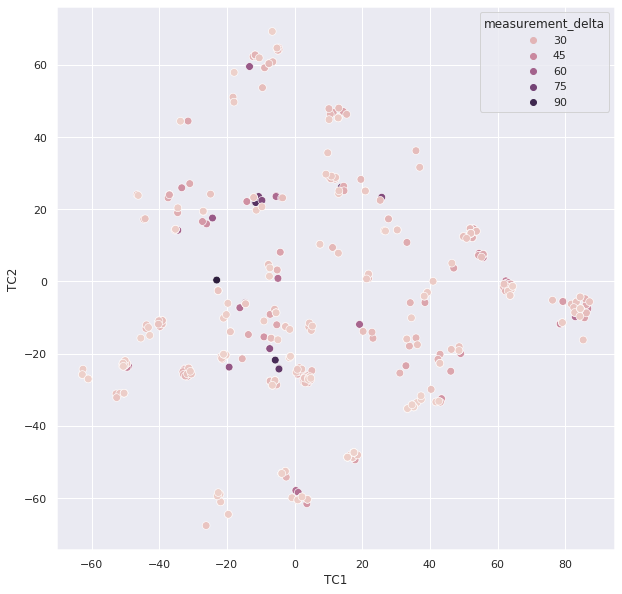

In [137]:
sns.scatterplot(x='TC1',y='TC2',data=tsne_RHS, s=60 ,alpha=1, hue=mmpa_zero_pos[mmpa_zero_pos['measurement_delta']>20]['measurement_delta']) 
